In [7]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import seaborn as sns
import sys
import scipy.stats as sc
import pandas as pd
import ffl

sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, Chi2Regression, BinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax  # Useful functions to print fit results on figure

sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 1)
sns.set_palette(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['figure.figsize'] = (16, 9)


# 2.1 - You make nine measurements of the speed of sound in water, and obtain as follows:

## 2.1.1 - What is the combined result and uncertainty of all your measurements?

I used equation (4.6) and (4.7) to calculate the weighted mean and the combined error.

The results were:

$$ V_{comb} = 1488 \pm 7 $$


In [8]:
v_sound = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
v_err = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

def comb_err(err):
    return np.sqrt(1/np.sum(1/(err)**2))

def wm(v, err):
    return np.sum(v/err**2)/np.sum(1/err**2)


v_wm = wm(v_sound, v_err)
comb_v_err = comb_err(v_err)
print(f'Combined resultes: {v_wm:.2f} +- {comb_v_err:.2f}')

Combined resultes: 1487.66 +- 6.70


## 2.1.2 - How much does adding the first five measurements improve the precision compared to the last four?

I assume that we are supposed to add the points once more, as if someone were to measure the exact same values.

As expeted from equation (4.7) the overall error changes more when adding the last 4 points, as they have the smallest error - we then see the uncertainty on our result drop to $\pm 5$. The error when adding the first five points again, doesn't change that much (only about 0.14) but as our precision in the experiment is with no decimals, the error doesn't seem to change at all from the original $\pm 7$. 

In [9]:
v_err_addfirst = np.concatenate((v_err, v_err[:5]))
v_err_addlast = np.concatenate((v_err, v_err[5:]))



comb_v_err_addfirst = comb_err(v_err_addfirst)
comb_v_err_addlast = comb_err(v_err_addlast)

print(f'Error after adding first five measurements again: {comb_v_err_addfirst:.0f}', f'Error after adding four last measurements again: {comb_v_err_addlast:.0f}')




Error after adding first five measurements again: 7 Error after adding four last measurements again: 5


## 2.1.3 - Are your measurements consistent with each other? If not, argue for an updated estimate.

Two answer this i cauculated a $\chi^2$ for all the measurements in relation to the weighted mean and the combined error. I then calculated a p_value for this $\chi^2$ with $N_{dof} = N_{measurements} = 9$

With $p(\chi^2 = 526.87, N_{dof} = 9) \approx 0$ we must reject that the measurements are consistent with each other. 



z-test value: 0.99


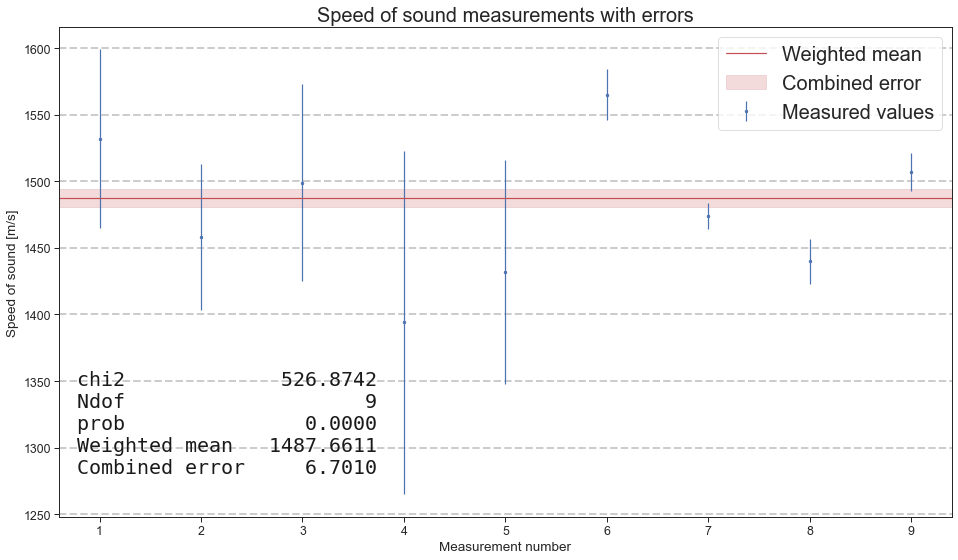

In [10]:
def z_test(v, mu, sigma):
    return np.abs(v - mu)/sigma

v_acutal = 1481
z_test_val = z_test(v_acutal, v_wm, comb_v_err)
print(f'z-test value: {z_test_val:.2f}')

def chi2(v, mu, sigma):
    return np.sum((v - mu)**2/sigma**2)

chi2_val = chi2(v_sound, v_wm, comb_v_err)
Ndof = len(v_sound)
p_val = sc.chi2.sf(chi2_val, Ndof)
chi2_dict = {'chi2': chi2_val, 'Ndof': Ndof, 'prob': p_val, 
             'Weighted mean': v_wm, 'Combined error': comb_v_err}


fig, ax = plt.subplots()
chi2_string = nice_string_output(chi2_dict, extra_spacing = 2, decimals = 4)
add_text_to_ax(0.02, 0.3, chi2_string, ax, fontsize = 20)

ax.errorbar(np.arange(1, 10), v_sound, yerr = v_err, fmt = '.', label = 'Measured values')
ax.axhline(v_wm, color = 'r', label = 'Weighted mean')
ax.axhspan(v_wm - comb_v_err, v_wm + comb_v_err, color = 'r', alpha = 0.2, label = 'Combined error')
ax.set_xlabel('Measurement number')
ax.set_ylabel('Speed of sound [m/s]')
ax.set_title('Speed of sound measurements with errors', fontsize=20)
ax.legend(fontsize = 20)

plt.savefig('saved_images/2_1_3_1.png')

z-test value (cleaned): 0.17


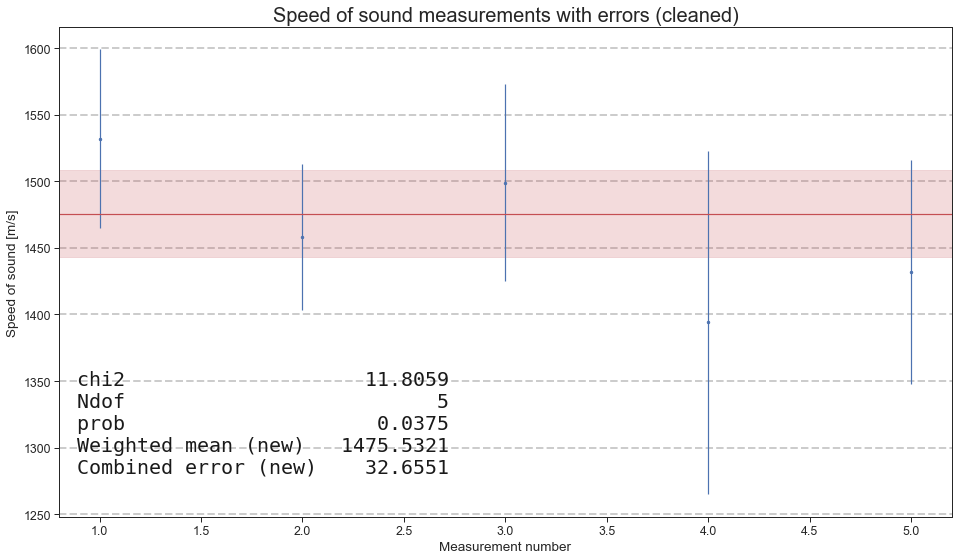

In [11]:
# Removing points 6 and 8

v_sound_new = np.delete(v_sound, [5, 6, 7, 8])
v_err_new = np.delete(v_err, [5, 6, 7, 8])

v_wm = wm(v_sound_new, v_err_new)
comb_v_err = comb_err(v_err_new)

z_test_val_new = z_test(v_acutal, v_wm, comb_v_err)
print(f'z-test value (cleaned): {z_test_val_new:.2f}')

chi2_new = chi2(v_sound_new, v_wm, comb_v_err)
Ndof_new = len(v_sound_new)
p_val_new = sc.chi2.sf(chi2_new, Ndof_new)

chi2_dict_new = {'chi2': chi2_new, 'Ndof': Ndof_new, 'prob': p_val_new,
                 'Weighted mean (new)': v_wm, 'Combined error (new)': comb_v_err}

fig, ax = plt.subplots()
chi2_string_new = nice_string_output(chi2_dict_new, extra_spacing = 2, decimals = 4)
add_text_to_ax(0.02, 0.3, chi2_string_new, ax, fontsize = 20)

ax.errorbar(np.arange(1, 6), v_sound_new, yerr = v_err_new, fmt = '.', label = 'Measured values')
ax.axhline(v_wm, color = 'r', label = 'Weighted mean')
ax.axhspan(v_wm - comb_v_err, v_wm + comb_v_err, color = 'r', alpha = 0.2, label = 'Combined error')
ax.set_xlabel('Measurement number')
ax.set_ylabel('Speed of sound [m/s]')
ax.set_title('Speed of sound measurements with errors (cleaned)', fontsize=20)


plt.savefig('saved_images/2_1_3_2.png')

To improve this, we could remove some of points with the smallest errors, resulting in a larger combined error, which would improve my $\chi^2$ and also my p-value. This would in practice NOT be a good idea, but for the sake of improving a p-value, I will try.
This is shown in the plot below, and as you can see, the $\chi^2$ is much improved. The p-value is now also a lot better at $p = 0.0375$ which is within a 97% significance level.

I also tried removing points the furthes away from the weighted mean using a t-test as refference, and i saw some improvements in the $\chi^2$ value, but little to none in the p-value

## 2.1.4 - The speed of sound in water is 1481m/s. Does your result agree with this value?

Without cleaning my data, the actual value is just within one sigma of the weighted mean. Specifically a $z = 0.99$.

For the cleaned data, i have a huge uncertainty, so naturally the actual value is within one sigma of the new weighted mean. Here the z-value is $z = 0.17$ so well within one sigma.

